In [1]:
import numpy as np
import scipy.signal as ss
import scipy.fft as fft
import matplotlib.pyplot as plt

In [2]:
fs = 15e3
f1 = 1e3
f2 = 5e3
N0 = 1e-3

N = 2**20
L = 2**8

noise_var = N0  * fs / 2
t = np.arange(N) / fs
sines = np.add(2*np.sin(2 * np.pi * f1 * t), 2*np.sin(2 * np.pi * f2 * t))
rng = np.random.default_rng()
noise = rng.normal(0, np.sqrt(noise_var), N)
signal = np.add(sines, noise)

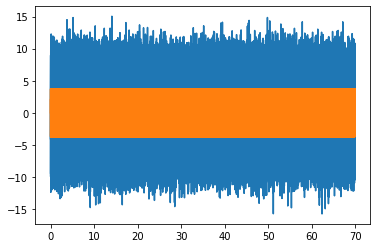

In [3]:
plt.plot(t, signal, t, sines)

In [4]:
f, Pxx = ss.periodogram(signal, fs)

(1e-06, 100.0)

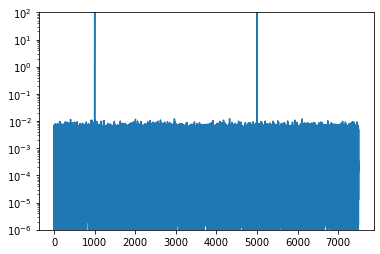

In [5]:
plt.semilogy(f, Pxx)
plt.ylim(10e-7, 10e1)

In [6]:
rxx = ss.correlate(signal, signal)
rxx /= np.max(rxx)
t_rxx = np.arange(-N / fs, N / fs, 1/fs)[:-1]

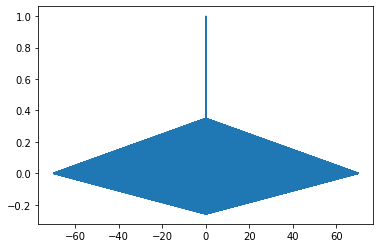

In [7]:
plt.plot(t_rxx, rxx)

In [8]:
w_triang = np.concatenate((np.zeros(int(N-L/2)), ss.triang(L), np.zeros(int(N-L/2-1))))
rxx_w = np.multiply(rxx, w_triang)

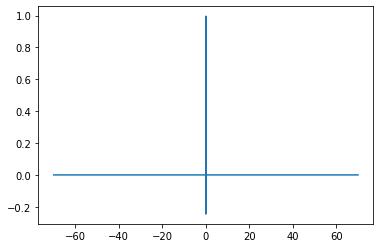

In [9]:
plt.plot(t_rxx, rxx_w)

In [12]:
Pxx_w = fft.fftshift(fft.fft(rxx_w))
f_w = fft.fftshift(fft.fftfreq(rxx_w.shape[0], 1/fs))

(0.1, 100.0)

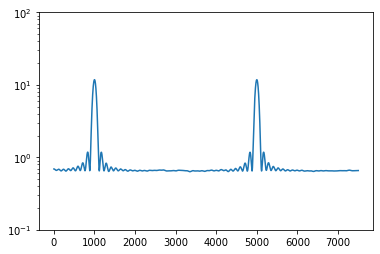

In [13]:
plt.semilogy(f_w[int(np.floor(rxx_w.shape[0] / 2)):], np.abs(Pxx_w)[int(np.floor(rxx_w.shape[0] / 2)):])
plt.ylim(1e-1, 1e2)